In [1]:
from preprocessing import load_fits, get_co_files, get_co_tracer_files
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Centers plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Load the CO and density data

In [3]:
def load_density_set(data_path='../data/Density'):
    return load_fits([str(file) for file in Path(data_path).glob('*')])


def load_co_set(data_path='../data/CleanCO'):
    co_files = get_co_files(data_path)
    tracer_files = get_co_tracer_files(data_path)

    return [np.concatenate(load_fits(x)) for x in [co_files, tracer_files]]

In [4]:
density_x, density_y = load_density_set()

co_x, co_y = load_co_set()

# Create some thresholds

In [5]:
median_density_y = np.median(density_y)
mean_density_y = np.mean(density_y)
range_center_density_y = (density_y.max() - density_y.min()) / 2

# Plots comparing the distributions at different thresholds

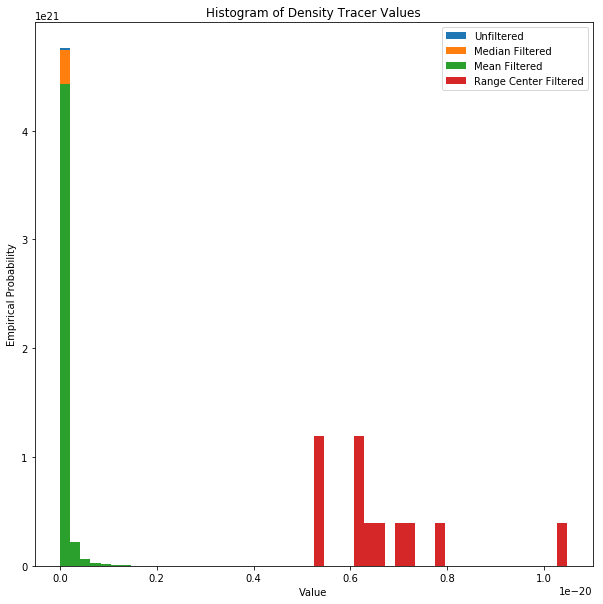

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Histogram of Density Tracer Values')
ax.set_xlabel('Value')
ax.set_ylabel('Empirical Probability')

n, bins, patches = ax.hist(density_y.flatten(), bins=50, density=True, label='Unfiltered')

filtered_density_y = density_y.flatten()[np.where(density_y.flatten() >= median_density_y)]
ax.hist(filtered_density_y, bins=bins, density=True, label='Median Filtered')

filtered_density_y = density_y.flatten()[np.where(density_y.flatten() >= mean_density_y)]
ax.hist(filtered_density_y, bins=bins, density=True, label='Mean Filtered')

filtered_density_y = density_y.flatten()[np.where(density_y.flatten() >= range_center_density_y)]
ax.hist(filtered_density_y, bins=bins, density=True, label='Range Center Filtered')

ax.legend();

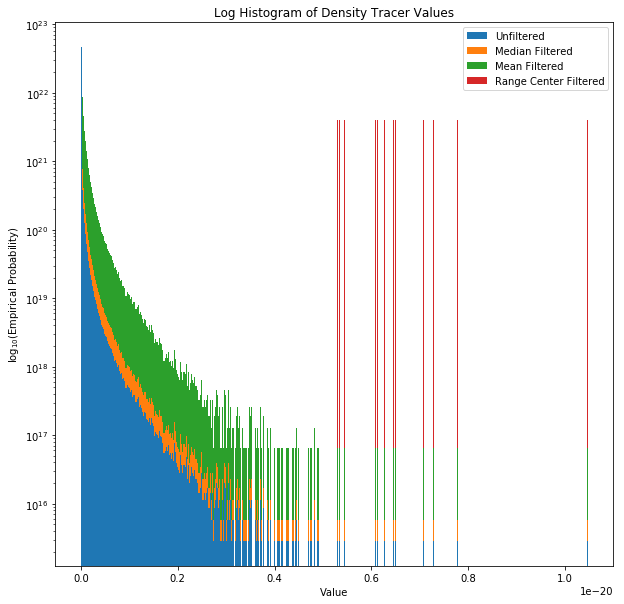

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Log Histogram of Density Tracer Values')
ax.set_xlabel('Value')
ax.set_ylabel('$\log_{10}$(Empirical Probability)')

n, bins, patches = ax.hist(density_y.flatten(), bins=500, density=True, log=True, label='Unfiltered', zorder=3);

filtered_density_y = density_y.flatten()[np.where(density_y.flatten() >= median_density_y)]
ax.hist(filtered_density_y, bins=bins, density=True, log=True, label='Median Filtered', zorder=2)

filtered_density_y = density_y.flatten()[np.where(density_y.flatten() >= mean_density_y)]
ax.hist(filtered_density_y, bins=bins, density=True, log=True, label='Mean Filtered', zorder=1)

filtered_density_y = density_y.flatten()[np.where(density_y.flatten() >= range_center_density_y)]
ax.hist(filtered_density_y, bins=bins, density=True, log=True, label='Range Center Filtered', zorder=0)
ax.legend();

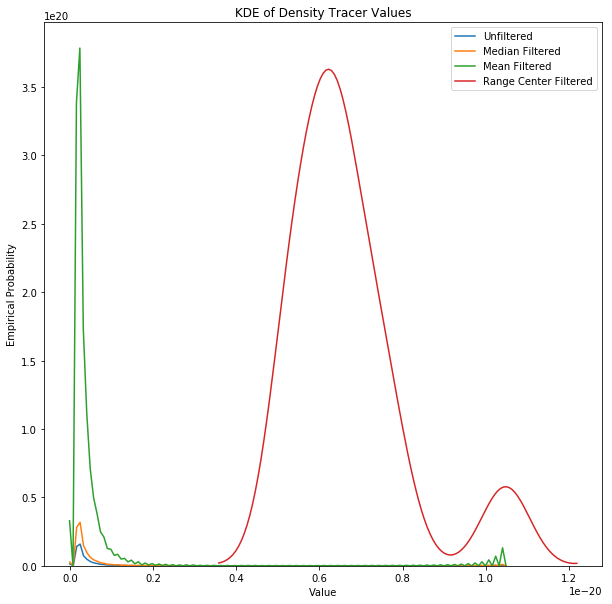

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('KDE of Density Tracer Values')
ax.set_xlabel('Value')
ax.set_ylabel('Empirical Probability')

sns.kdeplot(density_y.flatten(), label='Unfiltered', ax=ax)

filtered_density_y = density_y.flatten()[np.where(density_y.flatten() >= median_density_y)]
sns.kdeplot(filtered_density_y, label='Median Filtered', ax=ax)

filtered_density_y = density_y.flatten()[np.where(density_y.flatten() >= mean_density_y)]
sns.kdeplot(filtered_density_y, label='Mean Filtered', ax=ax)

filtered_density_y = density_y.flatten()[np.where(density_y.flatten() >= range_center_density_y)]
sns.kdeplot(filtered_density_y, label='Range Center Filtered', ax=ax)

ax.legend();

In [9]:
median_co_y = np.median(co_y)
mean_co_y = np.mean(co_y)
range_center_co_y = (co_y.max() - co_y.min()) / 2

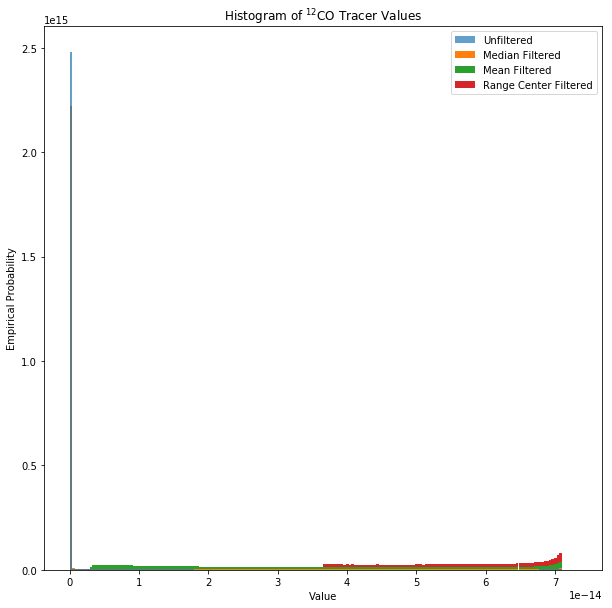

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Histogram of $^{12}$CO Tracer Values')
ax.set_xlabel('Value')
ax.set_ylabel('Empirical Probability')

n, bins, patches = ax.hist(co_y.flatten(), bins=200, density=True, label='Unfiltered', zorder=3, alpha=0.7)

filtered_co_y = co_y.flatten()[np.where(co_y.flatten() >= median_co_y)]
ax.hist(filtered_co_y, bins=bins, density=True, label='Median Filtered', zorder=2)

filtered_co_y = co_y.flatten()[np.where(co_y.flatten() >= mean_co_y)]
ax.hist(filtered_co_y, bins=bins, density=True, label='Mean Filtered', zorder=1)

filtered_co_y = co_y.flatten()[np.where(co_y.flatten() >= range_center_co_y)]
ax.hist(filtered_co_y, bins=bins, density=True, label='Range Center Filtered', zorder=0)

ax.legend();

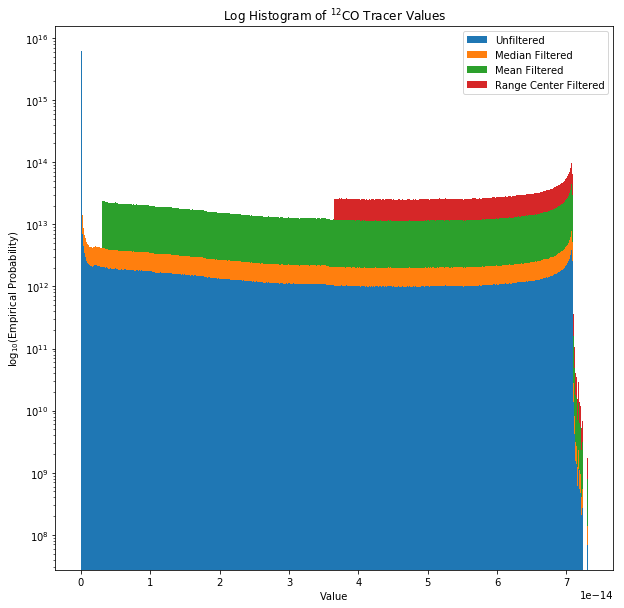

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

n, bins, patches = ax.hist(co_y.flatten(), bins=500, density=True, log=True, label='Unfiltered', zorder=3)

filtered_co_y = co_y.flatten()[np.where(co_y.flatten() >= median_co_y)]
ax.hist(filtered_co_y, bins=bins, density=True, log=True, label='Median Filtered', zorder=2)

filtered_co_y = co_y.flatten()[np.where(co_y.flatten() >= mean_co_y)]
ax.hist(filtered_co_y, bins=bins, density=True, log=True, label='Mean Filtered', zorder=1)

filtered_co_y = co_y.flatten()[np.where(co_y.flatten() >= range_center_co_y)]
ax.hist(filtered_co_y, bins=bins, density=True, log=True, label='Range Center Filtered', zorder=0)

ax.legend()
ax.set_title('Log Histogram of $^{12}$CO Tracer Values')
ax.set_ylabel('$\log_{10}$(Empirical Probability)')
ax.set_xlabel('Value');

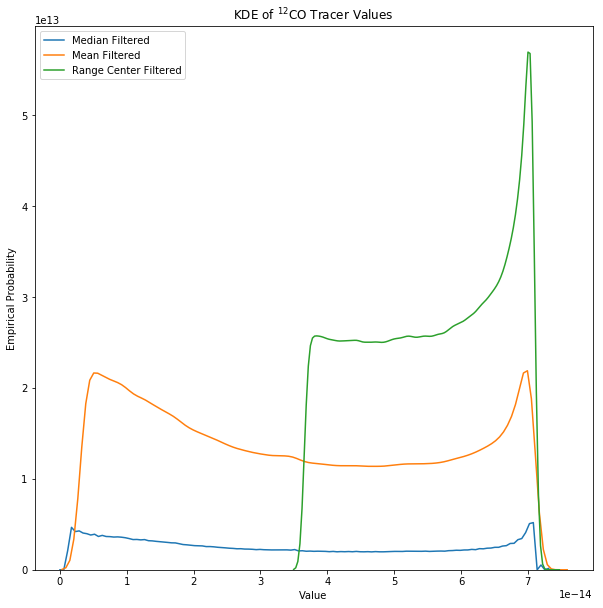

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('KDE of $^{12}$CO Tracer Values')
ax.set_xlabel('Value')
ax.set_ylabel('Empirical Probability')

filtered_co_y = co_y.flatten()[np.where(co_y.flatten() >= median_co_y)]
sns.kdeplot(filtered_co_y, label='Median Filtered', ax=ax)

filtered_co_y = co_y.flatten()[np.where(co_y.flatten() >= mean_co_y)]
sns.kdeplot(filtered_co_y, label='Mean Filtered', ax=ax)

filtered_co_y = co_y.flatten()[np.where(co_y.flatten() >= range_center_co_y)]
sns.kdeplot(filtered_co_y, label='Range Center Filtered', ax=ax)

ax.legend();